In [1]:
import json
from knnredo import get_top_similar
import pandas as pd
import seaborn as sns

In [2]:
ruta='pisos_limpios.csv'
df = pd.read_csv(ruta,sep=',')
df.set_index('uv', inplace=True)
with open('./perfiles/single.json') as archivo:
            opciones = json.load(archivo)

In [3]:
columnas = ['precio', 'habitaciones']
n_targets = 10
k = 3
# inds = [45, 56, 66, 77, 12]
# assert len(inds) == n_targets

dfs=[]

for i in range(n_targets):
    target = df.sample(1)
    df_test = df.copy()
    df_test.drop(target.index, axis=1, inplace=True)
    # target = df.loc[inds[i]]
    # get top similar
    similar_df = get_top_similar(df,target, opciones, k)

    # etiquetar target
    target['is_target'] = 1
    similar_df['is_target'] = 0
        
    # contains 4 houses with 3 cols: columns and is_target
    df_all = pd.concat([target, similar_df])[columnas + ['is_target']]
    # give color
    df_all['group'] = i

    dfs.append(df_all)

df_groups = pd.concat(dfs)

KeyError: "['UV/2020/000150'] not found in axis"

In [4]:
df_groups

,precio,habitaciones,is_target,group
uv,,,,
UV/2021/000409,399.0,2,1,0
UV/2021/000409,399.0,2,0,0
UV/2021/000408,320.0,2,0,0
UV/2020/000015,449.0,2,0,0
UV/2020/000309,120.0,3,1,1
UV/2021/000381,99.9,3,0,1
UV/2021/000410,97.0,3,0,1
UV/2020/000312,85.0,3,0,1
UV/2021/000374,280.0,2,1,2


<AxesSubplot:xlabel='precio', ylabel='habitaciones'>

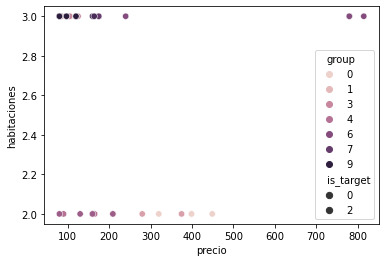

In [5]:
colores=['r','g','y','b','c']

sns.scatterplot(x=df_groups[columnas[0]], y=df_groups[columnas[1]], size=2*df_groups.is_target, hue=df_groups.group, sizes=(40,40))
